In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

axes = [3, 3, 3]
hard_path = [3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3]
easy_path = [3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3]
path = easy_path


In [92]:
cube = np.zeros((3,3,3))
cube.shape

def draw_cube(cube, highlight):
    alpha = 0.6
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Scaling is done from here...                                                                                                                           
    scale=np.diag(list(cube.shape)+[1.0])
    scale=scale*(1.0/scale.max())
    scale[3,3]=1.0

    def short_proj():
        return np.dot(Axes3D.get_proj(ax), scale)
    ax.get_proj=short_proj
    ax.view_init(40, 30)

    facecolors = np.where(cube == highlight, '#00D65DC0', '#7A88CCC0')
    ax.voxels(cube, facecolors=facecolors, edgecolors='grey')
    

The chain:


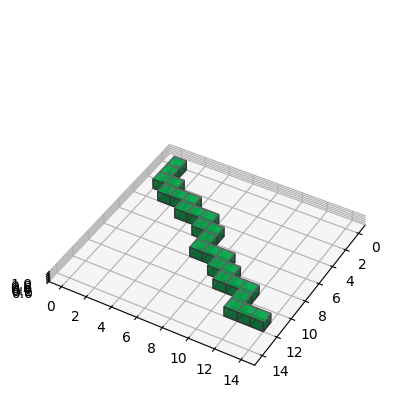

In [93]:
# Print a visual representation of the path
def visualize_path_text(path):
    # Store the current cursor position
    cursor = (0, 0)
    # Store the current direction
    vertical = False
    page = False
    print('X', end='')
    # Iterate over the path and print path to console as X's first horizontally, then vertically
    for i in path:
        i -= 1
        if vertical:
            for j in range(i):      
                print('')
                print(' ' * cursor[1] + 'X', end='')
                cursor = (cursor[0] + 1, cursor[1])
        else:
            print('X' * i, end='')
            cursor = (cursor[0], cursor[1] + i)
        vertical = not vertical
            

print("The chain:")
# visualize_path_text(path)

def visualize_path(path):
    rights = path[::2]
    downs = path[1::2]
    dimensions = (sum(rights) - len(rights)+1, sum(downs) - len(downs)+1)
    blocks = np.zeros(dimensions + (1,))
    cursor = (0, 0)
    for right, down in zip(rights, downs):
        cursor = (cursor[0]-1, cursor[1])
        for r in range(right):
            cursor = (cursor[0]+1, cursor[1])
            blocks[cursor] = 1
        cursor = (cursor[0], cursor[1]-1)
        for d in range(down):
            cursor = (cursor[0], cursor[1]+1)
            blocks[cursor] = 1
        
    draw_cube(blocks, 1)
    
visualize_path(path)

Starting position:(0, 0, 0)
Found solution!

Depth: 17

Depth: 16

Depth: 15

Depth: 14

Depth: 13

Depth: 12

Depth: 11

Depth: 10

Depth: 9

Depth: 8

Depth: 7

Depth: 6

Depth: 5

Depth: 4

Depth: 3

Depth: 2

Depth: 1
Step count: 54


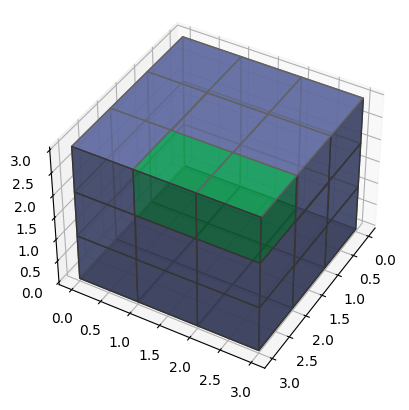

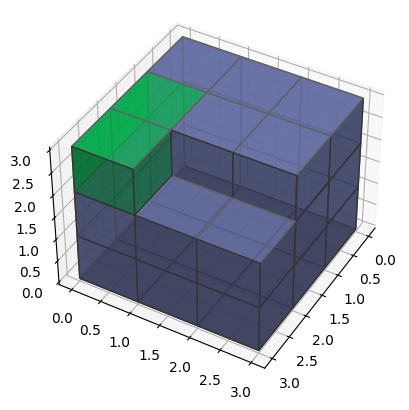

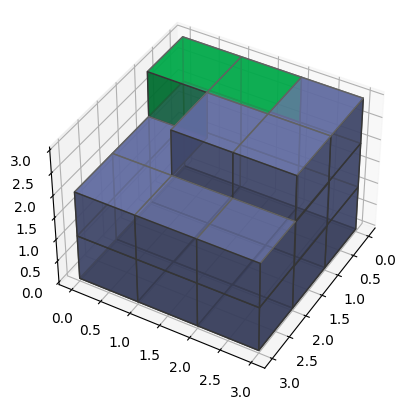

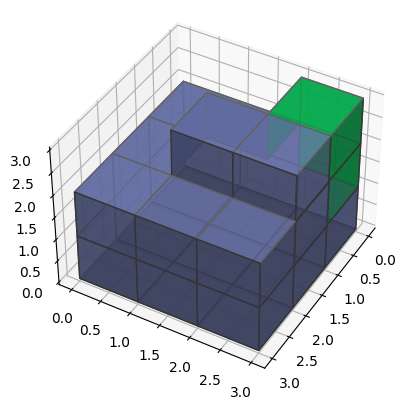

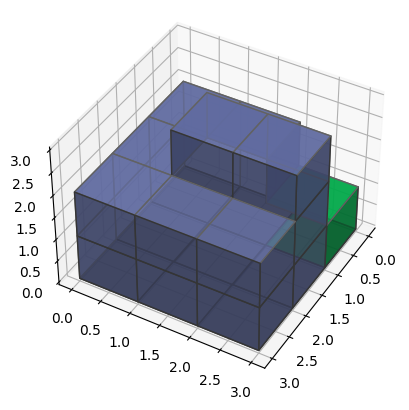

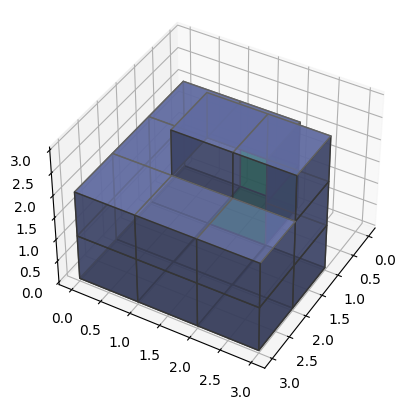

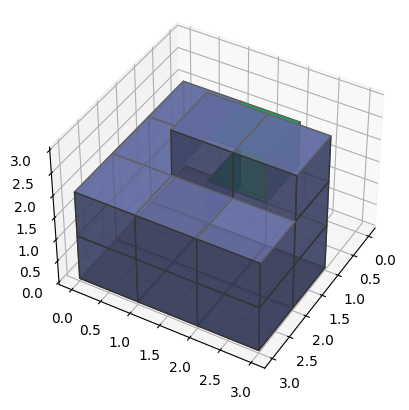

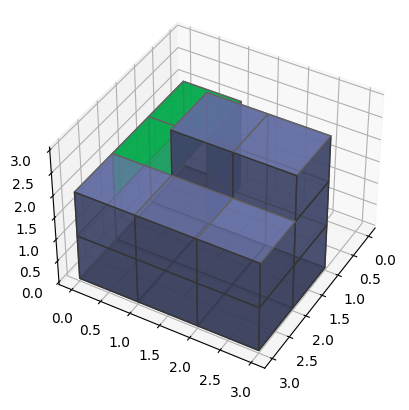

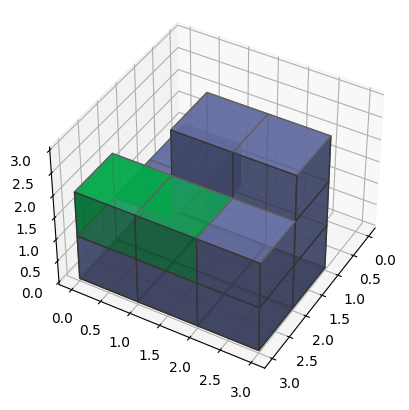

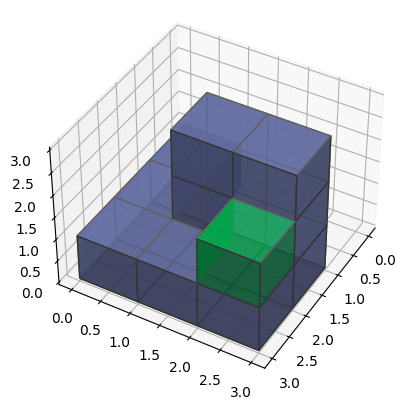

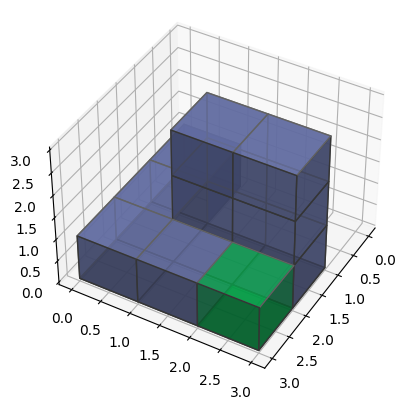

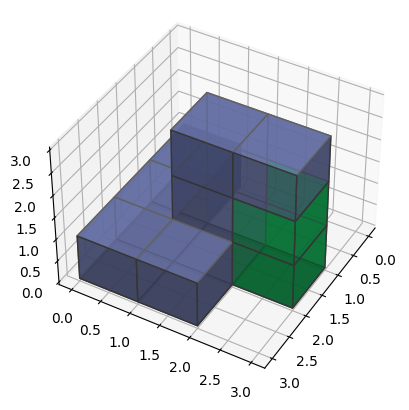

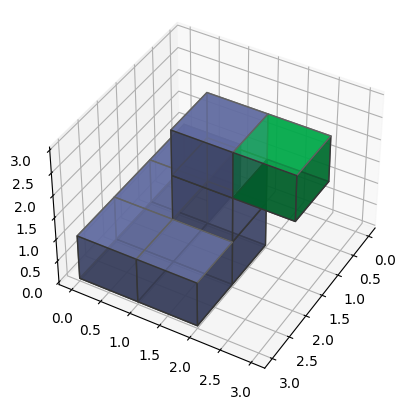

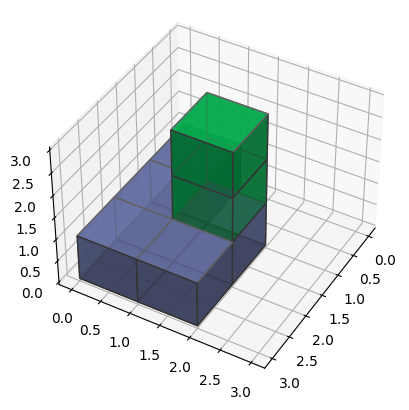

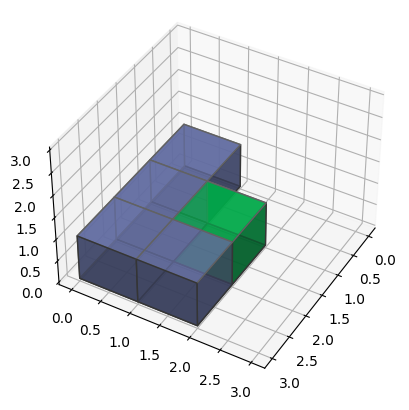

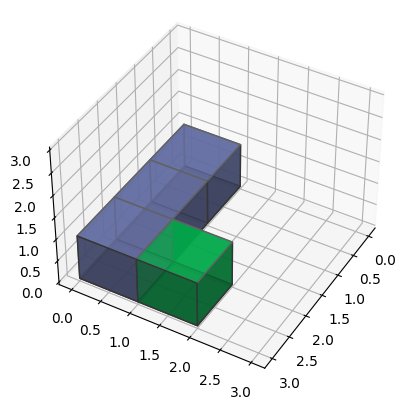

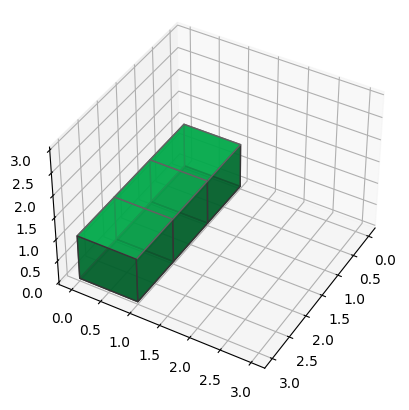

In [97]:
def start_positions(cube):
    for x in range(cube.shape[0]):
        for y in range(cube.shape[1]):
            for z in range(cube.shape[2]):
                yield (x, y, z)

def can_place(cube, position):
    
    result = [pi < si and pi >= 0 for pi, si in zip(position, cube.shape)]
    return (all(result) and cube[position] == 0)

def all_vectors():
    yield (-1,  0,  0)
    yield ( 1,  0,  0)
    yield ( 0, -1,  0)
    yield ( 0,  1,  0)
    yield ( 0,  0, -1)
    yield ( 0,  0,  1)

def place_positions(cube, position, ban_direction, length, depth):
    for vector in (v for v in all_vectors() if v != ban_direction):
        solution = cube.copy()
        next_pos = None
        for i in range(length-1):
            next_pos = tuple(np.asarray(position) + np.asarray(vector) * (i + 1)) 
            if not can_place(solution, next_pos):
                solution = None
                break
            solution[next_pos] = depth
        if solution is not None:
            yield (solution, next_pos, vector)
                
def step_solutions(cube, position, last_dir, path, depth=1):
    if (len(path) == 0):
        assert(np.all(cube))
        print("Found solution!")
        return cube

    global step_count
    step_count += 1
    for solution, next_position, direction in place_positions(cube, position, last_dir, path[0], depth):
        if step_solutions(solution, next_position, direction, path[1:], depth+1) is not None:
            print()
            print("Depth: " + str(depth))
            # print(str(solution))
            draw_cube(solution, depth)
            return solution
    return None

def solve(path):
    cube = np.zeros((3,3,3))
    steps = [cube]
    for position in start_positions(cube):
        start = cube.copy()
        start[(position)] = 1
        print ("Starting position:" + str(position))
        solution = step_solutions(start, position, None, path)
        if solution is not None:
            print("Step count: " + str(step_count))
            break

step_count = 0
solve(path)